# Programming Assignment 1: ML - CS6375.005 - Decision Trees
   ## Submitted by Anant Vaibhav (axv180022), Syed Abbas Rizvi Raza (sxr180040)
## Part(a): Create a decision tree using ID3 Algorithm for MONKs data set and plot training and testing error for each of 3 MONK's problem for depth 1 to 10.
## Part (b): Computing the confusionmatrix for all MONKs data set for depth = 1 and 2.

## Below Code implements part (a) and part (b). The decision tree has been made taking into account the ID3 algorithm

In [16]:
# decision_tree.py
# ---------
# Licensing Information:  You are free to use or extend these projects for
# personal and educational purposes provided that (1) you do not distribute
# or publish solutions, (2) you retain this notice, and (3) you provide clear
# attribution to UT Dallas, including a link to http://cs.utdallas.edu.
#
# This file is part of Programming Assignment 1 for CS6375: Machine Learning.
# Gautam Kunapuli (gautam.kunapuli@utdallas.edu)
# Sriraam Natarajan (sriraam.natarajan@utdallas.edu),
#
#
# INSTRUCTIONS:
# ------------
# 1. This file contains a skeleton for implementing the ID3 algorithm for
# Decision Trees. Insert your code into the various functions that have the
# comment "INSERT YOUR CODE HERE".
#
# 2. Do NOT modify the classes or functions that have the comment "DO NOT
# MODIFY THIS FUNCTION".
#
# 3. Do not modify the function headers for ANY of the functions.
#
# 4. You may add any other helper functions you feel you may need to print,
# visualize, test, or save the data and results. However, you MAY NOT utilize
# the package scikit-learn OR ANY OTHER machine learning package in THIS file.

%matplotlib inline
import numpy as np
import math
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

def create_feature_value_pairs(x):
    feature_pairs = []
    cols = x.shape[1]
    for i in range(0, cols):
        attr_val = set(x[:, i])
        for j in attr_val:
            feature_pairs.append((i, j))
    #print(AP)
    return feature_pairs

def partition(x):
    """
    Partition the column vector x into subsets indexed by its unique values (v1, ... vk)

    Returns a dictionary of the form
    { v1: indices of x == v1,
      v2: indices of x == v2,
      ...
      vk: indices of x == vk }, where [v1, ... vk] are all the unique values in the vector z.
    """

    # INSERT YOUR CODE HERE
    index_dictionary = {}

    for i in range(0, len(x)):
        if x[i] in index_dictionary.keys():
            index_dictionary[x[i]].append(i)
        else:
            index_dictionary[x[i]] = []
            index_dictionary[x[i]].append(i)

    return index_dictionary


def entropy(y):
    """
    Compute the entropy of a vector y by considering the counts of the unique values (v1, ... vk), in z

    Returns the entropy of z: H(z) = p(z=v1) log2(p(z=v1)) + ... + p(z=vk) log2(p(z=vk))
    """

    # INSERT YOUR CODE HERE
    _entropy = 0
    for i in set(y):
        Yi = y.count(i)/(len(y))
        _entropy += Yi*math.log2(Yi)

    _entropy= -1 * _entropy

    return _entropy


def mutual_information(x, y):
    """
    Compute the mutual information between a data column (x) and the labels (y). The data column is a single attribute
    over all the examples (n x 1). Mutual information is the difference between the entropy BEFORE the split set, and
    the weighted-average entropy of EACH possible split.

    Returns the mutual information: I(x, y) = H(y) - H(y | x)
    """
    # INSERT YOUR CODE HERE
    information_gain = 0
    conditional_entropy = 0
    X = partition(x)
    entropy_Y = entropy(y)

    for key, Value in X.items():
        temp = []
        for i in Value:
            temp.append(y[i])
        entropy_Y_X = entropy(temp)
        Prob_X = x.count(key)/len(x)
        conditional_entropy += entropy_Y_X*Prob_X

    information_gain = entropy_Y - conditional_entropy

    return information_gain


def id3(x, y, attribute_value_pairs=None, depth=0, max_depth=5):
    """
    Implements the classical ID3 algorithm given training data (x), training labels (y) and an array of
    attribute-value pairs to consider. This is a recursive algorithm that depends on three termination conditions
        1. If the entire set of labels (y) is pure (all y = only 0 or only 1), then return that label
        2. If the set of attribute-value pairs is empty (there is nothing to split on), then return the most common
           value of y (majority label)
        3. If the max_depth is reached (pre-pruning bias), then return the most common value of y (majority label)
    Otherwise the algorithm selects the next best attribute-value pair using INFORMATION GAIN as the splitting criterion
    and partitions the data set based on the values of that attribute before the next recursive call to ID3.

    The tree we learn is a BINARY tree, which means that every node has only two branches. The splitting criterion has
    to be chosen from among all possible attribute-value pairs. That is, for a problem with two features/attributes x1
    (taking values a, b, c) and x2 (taking values d, e), the initial attribute value pair list is a list of all pairs of
    attributes w
     (x1, b),ith their corresponding values:
    [(x1, a),
     (x1, c),
     (x2, d),
     (x2, e)]
     If we select (x2, d) as the best attribute-value pair, then the new decision node becomes: [ (x2 == d)? ] and
     the attribute-value pair (x2, d) is removed from the list of attribute_value_pairs.

    The tree is stored as a nested dictionary, where each entry is of the form
                    (attribute_index, attribute_value, True/False): subtree
    * The (attribute_index, attribute_value) determines the splitting criterion of the current node. For example, (4, 2)
    indicates that we test if (x4 == 2) at the current node.
    * The subtree itself can be nested dictionary, or a single label (leaf node).
    * Leaf nodes are (majority) class labels

    Returns a decision tree represented as a nested dictionary, for example
    {(4, 1, False):
        {(0, 1, False):
            {(1, 1, False): 1,
             (1, 1, True): 0},
         (0, 1, True):
            {(1, 1, False): 0,
             (1, 1, True): 1}},
     (4, 1, True): 1}
    """

    # INSERT YOUR CODE HERE. NOTE: THIS IS A RECURSIVE FUNCTION.
    
    # Creating Attribute Value Pairs if not created
    
    cols = x.shape[1]
    rows = x.shape[0]

    if attribute_value_pairs is None:
        attribute_value_pairs = create_feature_value_pairs(x)

    c = Counter(y)
    value, count = c.most_common()[0]

    # Base Case Check
    if len(set(y)) == 1:
        return y[0]

    elif len(attribute_value_pairs) == 0 or depth == max_depth:
        return value    
    
    root = {}
    max_gain = 0
    pair = ()

    for each in attribute_value_pairs:
        temp = []
        Feature = each[0]
        value = each[1]
        for row in x[:, Feature]:
            if row == value:
                temp.append(1)
            else:
                temp.append(0)

        information_gain = mutual_information(temp, y)
        if information_gain >= max_gain:
            max_gain = information_gain
            pair = each
    try:
        X = partition(x[:, pair[0]])
        row_id = X[pair[1]]

    except Exception as e:
        print(pair)
        print(X)
        exit(0)

    X_False = np.empty((0,cols))
    Y_False = []

    X_True = np.empty((0, cols))
    Y_True = []
    
    for i in range(0, rows):
        temp = np.asarray(x[i, :])
        temp = temp.reshape(1, cols)
        
        if i in row_id:    
            X_True = np.vstack((X_True, temp))
            Y_True.append(y[i])
        else:
            X_False = np.vstack((X_False, temp))
            Y_False.append(y[i])

    copy1 = attribute_value_pairs.copy()
    copy2 = attribute_value_pairs.copy()

    copy1.remove(pair)
    copy2.remove(pair)
    root ={(pair[0], pair[1], True): id3(X_True, Y_True, copy1, depth+1, max_depth), \
            (pair[0], pair[1], False): id3(X_False, Y_False, copy2, depth+1, max_depth)}

    return root


def predict_example(x, tree):
    """
    Predicts the classification label for a single example x using tree by recursively descending the tree until
    a label/leaf node is reached.

    Returns the predicted label of x according to tree
    """

    # INSERT YOUR CODE HERE. NOTE: THIS IS A RECURSIVE FUNCTION.
    if tree ==0 or tree ==1:
        return tree

    key = next(iter(tree))
    attr = key[0]
    val = key[1]

    if x[attr] == val:
        return predict_example(x, tree[(attr, val, True)])
    else:
        return predict_example(x, tree[(attr, val, False)])


def compute_error(y_true, y_pred):
    """
    Computes the average error between the true labels (y_true) and the predicted labels (y_pred)

    Returns the error = (1/n) * sum(y_true != y_pred)
    """

    # INSERT YOUR CODE HERE
    count = 0 
    for i in range(0, len(y_true)):
        if y_true[i]!= y_pred[i]:
            count+=1
    
    return count/len(y_true)


def visualize(tree, depth=0):
    """
    Pretty prints (kinda ugly, but hey, it's better than nothing) the decision tree to the console. Use print(tree) to
    print the raw nested dictionary representation.
    DO NOT MODIFY THIS FUNCTION!
    """

    if depth == 0:
        print('TREE')

    for index, split_criterion in enumerate(tree):
        sub_trees = tree[split_criterion]

        # Print the current node: split criterion
        print('|\t' * depth, end='')
        print('+-- [SPLIT: x{0} = {1}]'.format(split_criterion[0], split_criterion[1]))

        # Print the children
        if type(sub_trees) is dict:
            visualize(sub_trees, depth + 1)
        else:
            print('|\t' * (depth + 1), end='')
            print('+-- [LABEL = {0}]'.format(sub_trees))

def confusionMatrix(Predicted_Value, True_Value):
    Matrix = []
    for i in range(0, len(Predicted_Value)):
        Tn = Fn = Tp = Fp = 0
        y_p = Predicted_Value[i]
        y_o = True_Value[i]
        for i in range(0, len(y_p)):
            if y_p[i]==0 and y_o[i]==0:
                Tn+=1
            if y_p[i]==1 and y_o[i]==1:
                Tp+=1
            if y_p[i]==1 and y_o[i]==0:
                Fp+=1
            if y_p[i]==0 and y_o[i]==1:
                Fn+=1
        Matrix.append([Tp, Fn, Fp, Tn])
    return Matrix

## Below is the main for plotting the train and test errors versus depth of decision tree created in above code snippet using ID3 and also printing the confusion matrix for all 3 MONKs data set



For MONKS dataset 1
Test Error at depth 1  = 25.00%.
Test Error at depth 2  = 25.00%.
Test Error at depth 3  = 16.67%.
Test Error at depth 4  = 16.67%.
Test Error at depth 5  = 16.67%.
Test Error at depth 6  = 11.11%.
Test Error at depth 7  = 11.11%.
Test Error at depth 8  = 11.11%.
Test Error at depth 9  = 10.19%.
Test Error at depth 10  = 10.19%.


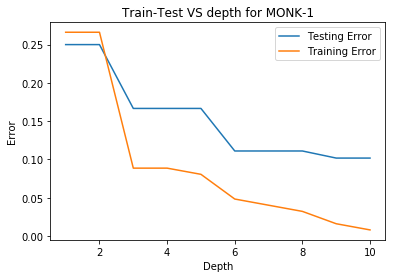



Confusion Matrix for MONK 1 at Depth  1 :
                    Predicted POSITIVE  Predicted NEGETIVE
Actual Value TRUE                  108                 108
Actual Value FALSE                   0                 216


Confusion Matrix for MONK 1 at Depth  2 :
                    Predicted POSITIVE  Predicted NEGETIVE
Actual Value TRUE                  108                 108
Actual Value FALSE                   0                 216


For MONKS dataset 2
Test Error at depth 1  = 32.87%.
Test Error at depth 2  = 37.50%.
Test Error at depth 3  = 33.80%.
Test Error at depth 4  = 37.04%.
Test Error at depth 5  = 29.63%.
Test Error at depth 6  = 21.30%.
Test Error at depth 7  = 14.81%.
Test Error at depth 8  = 12.96%.
Test Error at depth 9  = 12.96%.
Test Error at depth 10  = 12.96%.


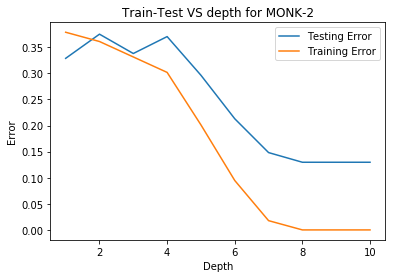



Confusion Matrix for MONK 2 at Depth  1 :
                    Predicted POSITIVE  Predicted NEGETIVE
Actual Value TRUE                    0                 142
Actual Value FALSE                   0                 290


Confusion Matrix for MONK 2 at Depth  2 :
                    Predicted POSITIVE  Predicted NEGETIVE
Actual Value TRUE                   26                 116
Actual Value FALSE                  46                 244


For MONKS dataset 3
Test Error at depth 1  = 19.44%.
Test Error at depth 2  = 2.78%.
Test Error at depth 3  = 5.56%.
Test Error at depth 4  = 4.63%.
Test Error at depth 5  = 10.19%.
Test Error at depth 6  = 10.19%.
Test Error at depth 7  = 10.19%.
Test Error at depth 8  = 9.72%.
Test Error at depth 9  = 9.95%.
Test Error at depth 10  = 9.95%.


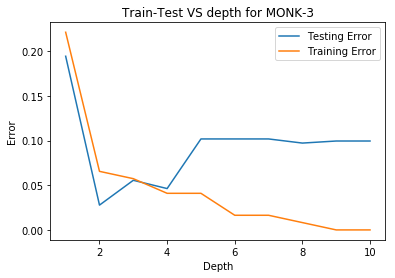



Confusion Matrix for MONK 3 at Depth  1 :
                    Predicted POSITIVE  Predicted NEGETIVE
Actual Value TRUE                  216                  12
Actual Value FALSE                  72                 132


Confusion Matrix for MONK 3 at Depth  2 :
                    Predicted POSITIVE  Predicted NEGETIVE
Actual Value TRUE                  216                  12
Actual Value FALSE                   0                 204


In [19]:
if __name__ == '__main__':
    
    row_labels = ['Actual Value TRUE', 'Actual Value FALSE']
    column_labels = ['Predicted POSITIVE', 'Predicted NEGETIVE']
    for m in range(1,4):
        Predicted_Value = []
        True_Value = []
        print('\n\n==========================')
        print('For MONKS dataset', m)
        print('==========================')
        
        # Load the training data
        dataPathTrain = './data/monks-'+str(m)+'.train'
        dataPathTest = './data/monks-'+str(m)+'.test'
        M = np.genfromtxt(dataPathTrain, missing_values=0, skip_header=0, delimiter=',', dtype=int)
        ytrn = M[:, 0]
        ytrn = ytrn.tolist()
        Xtrn = M[:, 1:]
    
        # Load the test data
        M = np.genfromtxt(dataPathTest, missing_values=0, skip_header=0, delimiter=',', dtype=int)
        ytst = M[:, 0]
        Xtst = M[:, 1:]
    
        depth = []
        train = []
        test = []
        for i in range(1, 11):
            depth.append(i)
            # Learn a decision tree of depth 3
            decision_tree = id3(Xtrn, ytrn, max_depth=i)

            #visualize(decision_tree)
            
            # Compute the test error
            y_train = [predict_example(x, decision_tree) for x in Xtrn]
            train_err = compute_error(ytrn, y_train)
            train.append(train_err)
    
            y_pred = [predict_example(x, decision_tree) for x in Xtst]
            tst_err = compute_error(ytst, y_pred)
            test.append(tst_err)
            print('Test Error at depth',i,' = {0:4.2f}%.'.format(tst_err * 100))
            
            if i<=2:
                Predicted_Value.append(y_pred)
                True_Value.append(ytst)
                
        Confusion_Matrix = confusionMatrix(Predicted_Value, True_Value)
        plt.ylabel('Error')
        plt.xlabel('Depth')
        plt.title('Train-Test VS depth for MONK-' + str(m))
        plt.plot(depth, test)
        plt.plot(depth, train)
    
        plt.legend(['Testing Error', 'Training Error'], loc='upper right')
        plt.show()
        
        
        for i in range(0, len(Confusion_Matrix)):
            print('\n\nConfusion Matrix for MONK', str(m), 'at Depth ', str(i+1),':')
            Conf_mat = np.array(Confusion_Matrix[i]).reshape(2,2)
            df = pd.DataFrame( Conf_mat, columns=column_labels, index=row_labels)
            print(df)

#End of Main

## End of Part (a),(b)

## Part (c) Decision Tree over Monks-1 data set

## Importing libraries for the usage

In [3]:
import numpy as np
from sklearn import tree
import graphviz
import pydotplus
import collections
from IPython.display import Image

## Creating the training data

In [4]:
Train = np.genfromtxt('./data/monks-1.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
Y_train = Train[:, 0]
X_train = Train[:, 1:]
Data_feature_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

## Fitting the model using training data on decision tree classifier

In [5]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Visualizing the Tree using graphviz

 After fittng the training data on decision tree, we can visualize the decision tree and see its nodes and leaves.
 We also export the tree to a png file.
 
 We can see below after the code how the tree looks like.

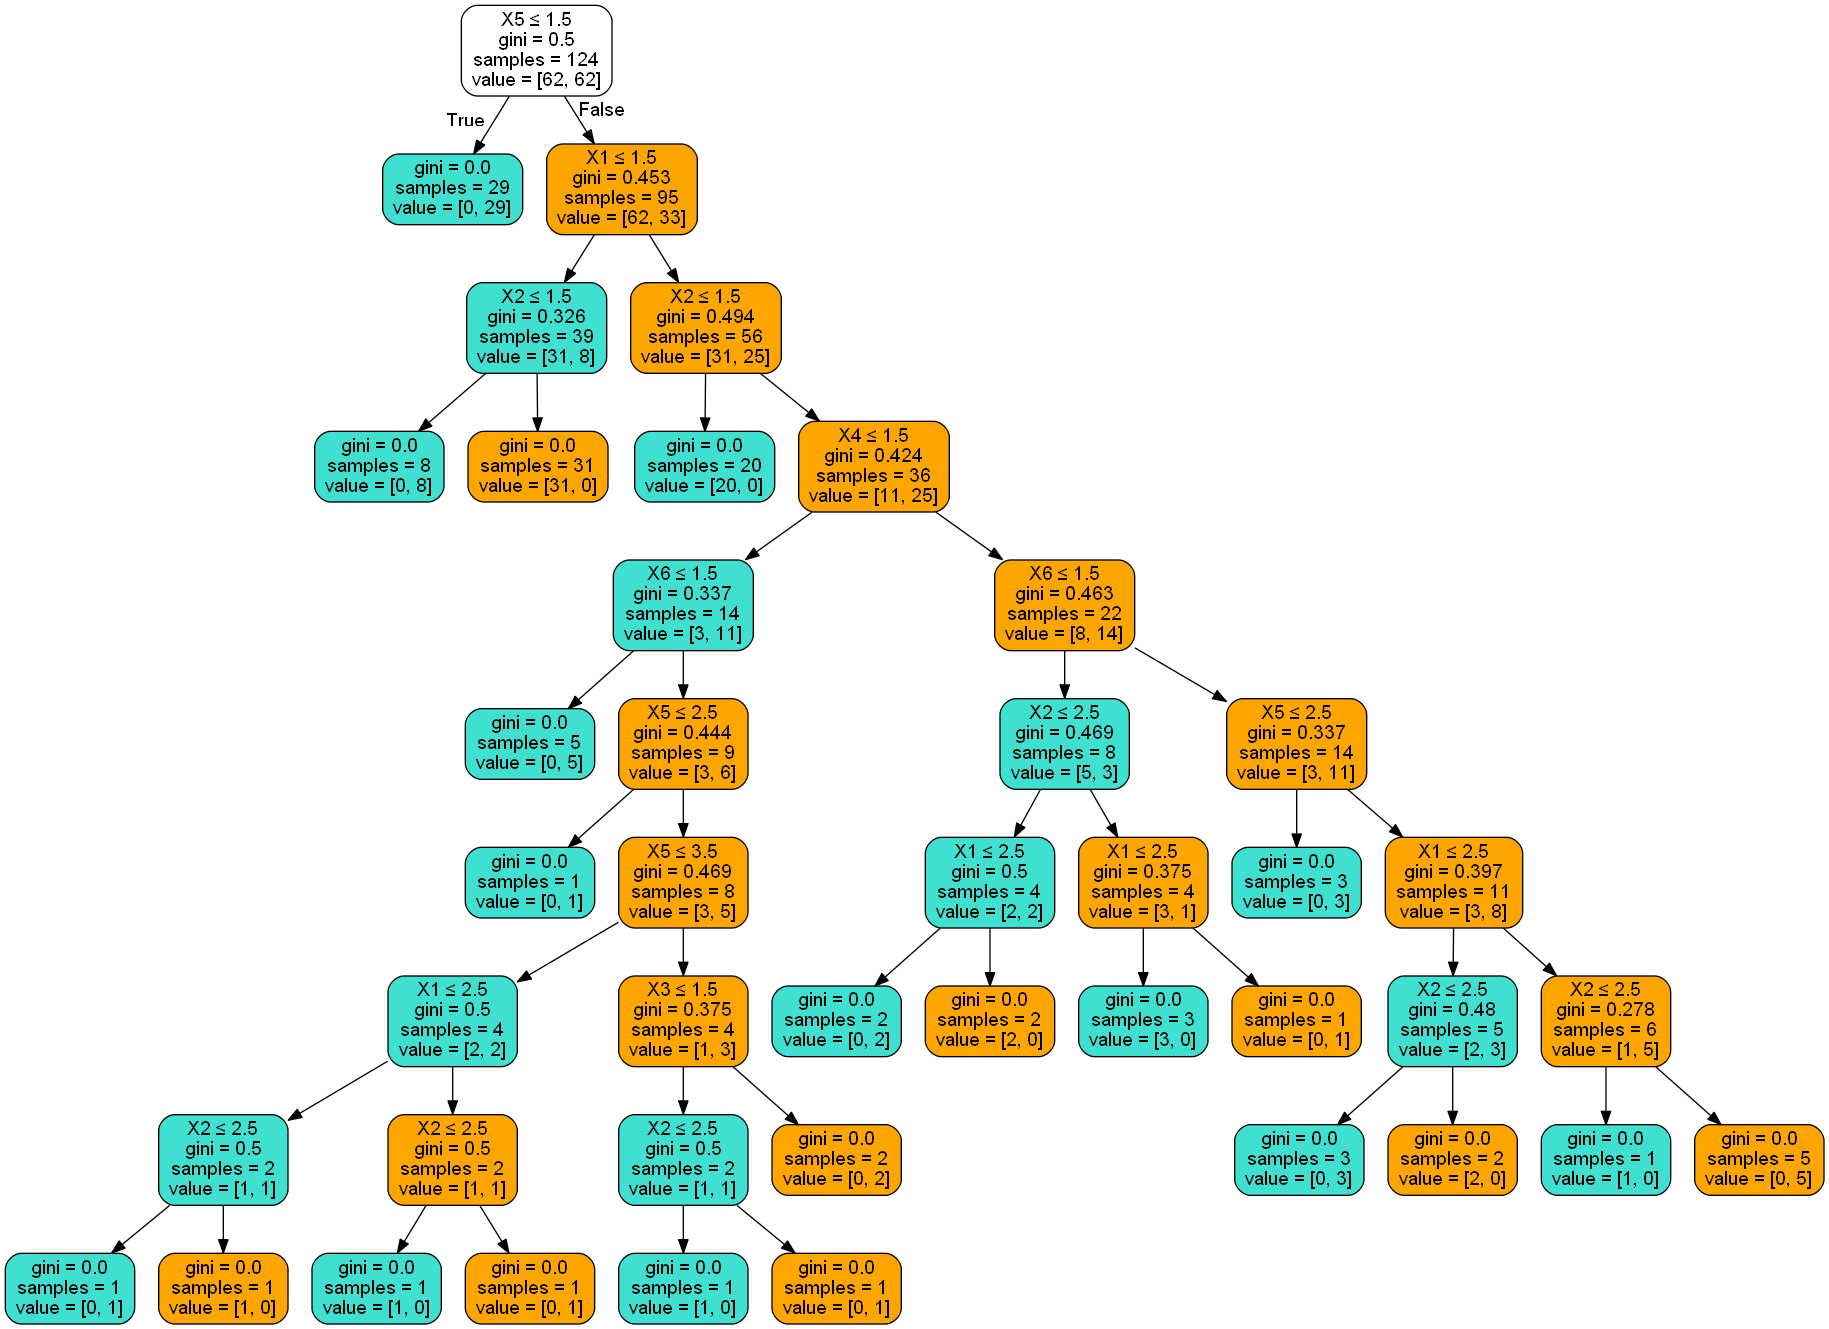

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=Data_feature_names,
                                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
#graph = graphviz.Source(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
graph.write_png('tree.png')

Image(filename='tree.png') 

## Predicting on the test data and measuring its accuracy.

In [7]:
Test = np.genfromtxt('./data/monks-1.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
Y_test = Test[:, 0]
X_test = Test[:, 1:]
Y_predict = clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_predict)

0.9351851851851852

## Calculating the Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
import pandas as pd

print('Below is the confusion matrix for the model')

pd.DataFrame(
    confusion_matrix(Y_test, Y_predict),
    columns=[ 'Predicted Negatives','Predicted Positives'],
    index=['Actual Value FALSE','Actual Value TRUE' ]
)

Below is the confusion matrix for the model


,Predicted Negatives,Predicted Positives
Actual Value FALSE,1187,0
Actual Value TRUE,0,844


## Part (d) Decision Tree over Mushroom data set

## Importing libraries for the usage

In [9]:
import numpy as np
from sklearn import tree
import graphviz
import pydotplus
import collections
from IPython.display import Image

## Creating the training data

In [10]:
Train = np.genfromtxt('./data/mushroom.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
Y_train = Train[:, 0]
X_train = Train[:, 1:]
Data_feature_names = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u']

## Fitting the model using training data on decision tree classifier

In [11]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Visualizing the Tree using graphviz

 After fittng the training data on decision tree, we can visualize the decision tree and see its nodes and leaves.
 We also export the tree to a png file.
 
 We can see below after the code how the tree looks like.

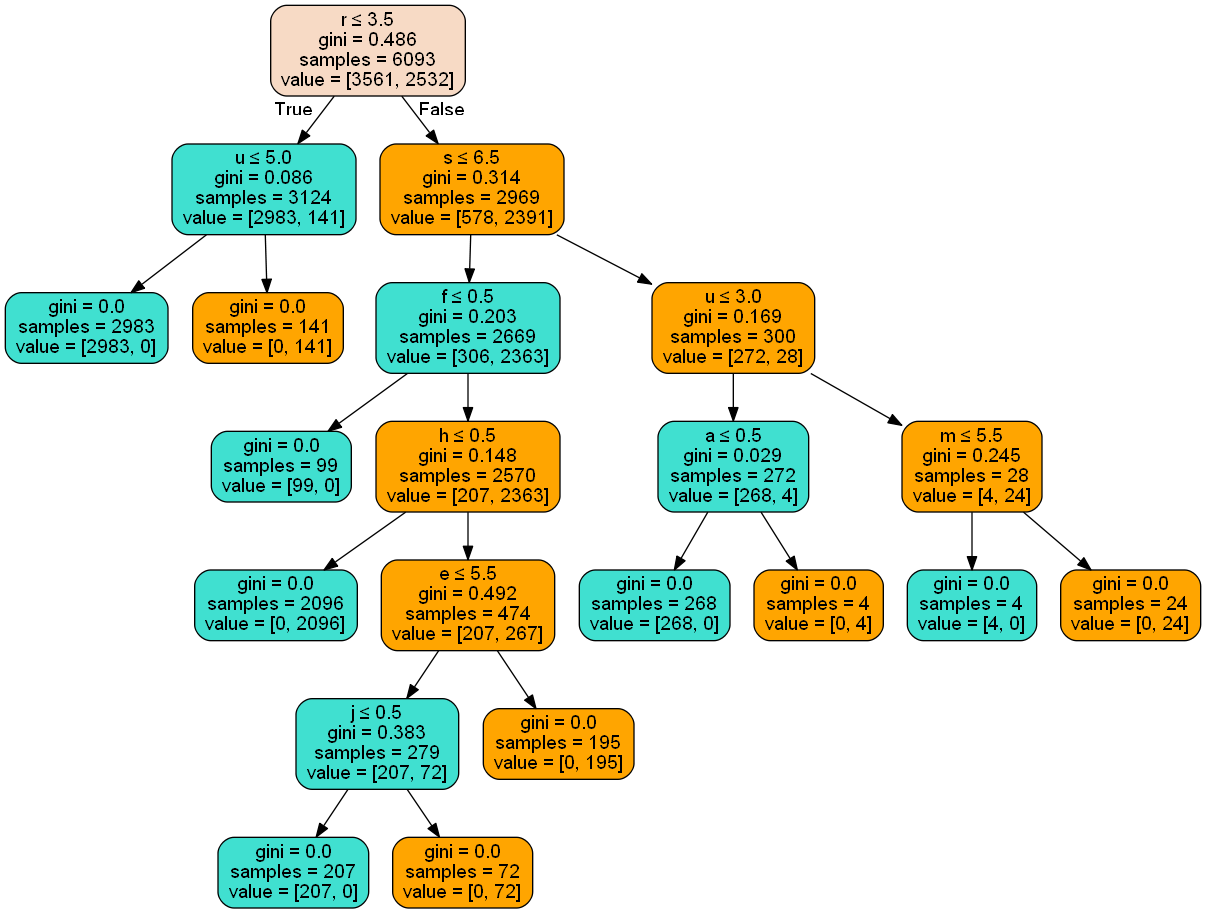

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=Data_feature_names,
                                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
#graph = graphviz.Source(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
graph.write_png('tree.png')

Image(filename='tree.png') 

## Predicting on the test data and measuring its accuracy.

In [13]:
Test = np.genfromtxt('./data/mushroom.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
Y_test = Test[:, 0]
X_test = Test[:, 1:]
Y_predict = clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_predict)

1.0

## Calculating the Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
import pandas as pd

print('Below is the confusion matrix for the model')

pd.DataFrame(
    confusion_matrix(Y_test, Y_predict),
    columns=[ 'Predicted Negatives','Predicted Positives'],
    index=['Actual Value FALSE','Actual Value TRUE' ]
)

Below is the confusion matrix for the model


,Predicted Negatives,Predicted Positives
Actual Value FALSE,1187,0
Actual Value TRUE,0,844
